In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter

In [48]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [49]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [50]:
df_model_CDB = df_model[df_model.Powertrain == 'conventional'].copy()

In [51]:
df_model_HEB = df_model[df_model.Powertrain == 'hybrid'].copy()

In [52]:
df_model_BEB = df_model[df_model.Powertrain == 'electric'].copy()

In [53]:
df_daily_energy_model_CDB = df_model_CDB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [54]:
df_daily_energy_model_HEB = df_model_HEB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [55]:
df_daily_energy_model_BEB = df_model_BEB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [56]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [57]:
df_validation_CDB = df_validation[df_validation.Powertrain == 'conventional'].copy()

In [58]:
df_validation_HEB = df_validation[df_validation.Powertrain == 'hybrid'].copy()

In [59]:
df_validation_BEB = df_validation[df_validation.Powertrain == 'electric'].copy()

In [60]:
df_validation_CDB = df_validation_CDB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [61]:
df_validation_HEB = df_validation_HEB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [62]:
df_validation_BEB = df_validation_BEB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

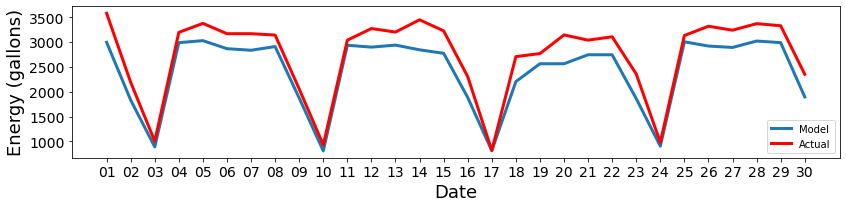

In [66]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 3))

fig=plt.plot(df_daily_energy_model_CDB.Date, df_daily_energy_model_CDB.Energy, label='Model',linewidth=3)
fig=plt.plot(df_validation_CDB.date, df_validation_CDB.gallons, label='Actual', color='red', linewidth=3)

# Add title and labels

plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy (gallons)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

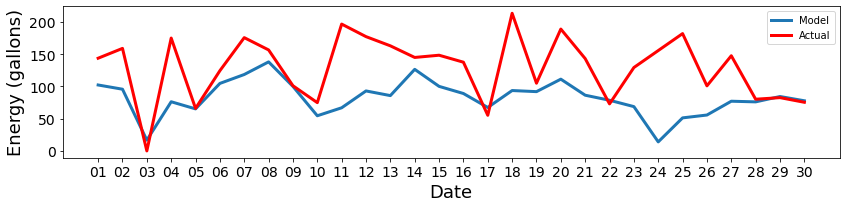

In [64]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 3))

fig=plt.plot(df_daily_energy_model_HEB.Date, df_daily_energy_model_HEB.Energy, label='Model', 
         linewidth=3)
fig=plt.plot(df_validation_HEB.date, df_validation_HEB.gallons, label='Actual', color='red', 
         linewidth=3)

# Add title and labels

plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy (gallons)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

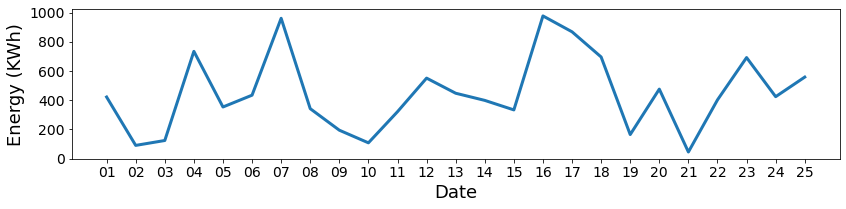

In [67]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 3))

fig=plt.plot(df_daily_energy_model_BEB.Date, df_daily_energy_model_BEB.Energy, label='Model', linewidth=3)
#fig=plt.plot(df_validation_BEB.date, df_validation_BEB.gallons, label='Actual', color='red', linewidth=3)

# Add title and labels

plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy (KWh)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

#plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-BEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [46]:
df_model_CDB.nlargest(5, 'Energy')

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,ServiceDateTime,Unnamed: 0,Unnamed: 0.1,DateKey,CalendarDate,Year,Month,...,geometry,dist,Speed,Acceleration,time_delta,time_delta_in_seconds,Powertrain,VehicleModel,Vehicle_mass,Energy
640285,1129672,1129672,640285,2022-04-26 12:15:24,640285,1131488,8785,2022-04-26 00:00:00.000,2022,4,...,POINT (-72.54524 42.13792),0.723648,2096.273485,290.453593,0 days 00:00:02,2.0,conventional,New Flyer 40 conventional,26000.0,30059.407660
388111,392547,392547,388111,2022-04-09 12:19:17,388111,386672,8768,2022-04-09 00:00:00.000,2022,4,...,POINT (-72.51432 42.13764),0.231097,1338.887905,366.432779,0 days 00:00:01,1.0,conventional,New Flyer 35 conventional,26900.0,12211.999324
395361,1084232,1084232,395361,2022-04-25 14:13:13,395361,1095067,8784,2022-04-25 00:00:00.000,2022,4,...,POINT (-72.60273 42.19014),0.344522,665.342952,60.573972,0 days 00:00:03,3.0,conventional,New Flyer 35 conventional,26900.0,231.689026
395478,1095542,1095542,395478,2022-04-25 17:14:04,395478,1095628,8784,2022-04-25 00:00:00.000,2022,4,...,POINT (-72.60273 42.19014),0.344522,665.342952,60.633283,0 days 00:00:03,3.0,conventional,New Flyer 35 conventional,26900.0,223.499077
749058,355498,355498,749058,2022-04-08 14:57:58,749058,328688,8767,2022-04-08 00:00:00.000,2022,4,...,POINT (-72.56661 42.09712),0.075489,437.357373,115.547654,0 days 00:00:01,1.0,conventional,New Flyer 40 conventional,26000.0,117.570749
